# Stock Trend based on Fundamentals
Predicting stock performance for the next quarter based on quarterly fundamental financials. 

__Classification Problem__
 
 +-3%

__Classes__
- Buy  
- Sell 
- Hold


# Imports

In [37]:
# data manipulating
import pandas as pd
import numpy as np

# plotting and visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning models and utils from sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sklearn.metrics
from sklearn.utils.multiclass import type_of_target

import autosklearn.classification

/home/alpha91/miniconda3/envs/ds/lib/python3.8/site-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


# Importing the Generated Data

In [4]:
# import datasets
X_raw = pd.read_csv("dataset_normalised.csv")
y_raw = pd.read_csv("labnf.csv")

# numberical column that are needed for training
numeric_columns=['Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity',
       'Price_Present']

# the final X and Y 
X = X_raw[numeric_columns]
y = y_raw["Label"]

# Data Visualization

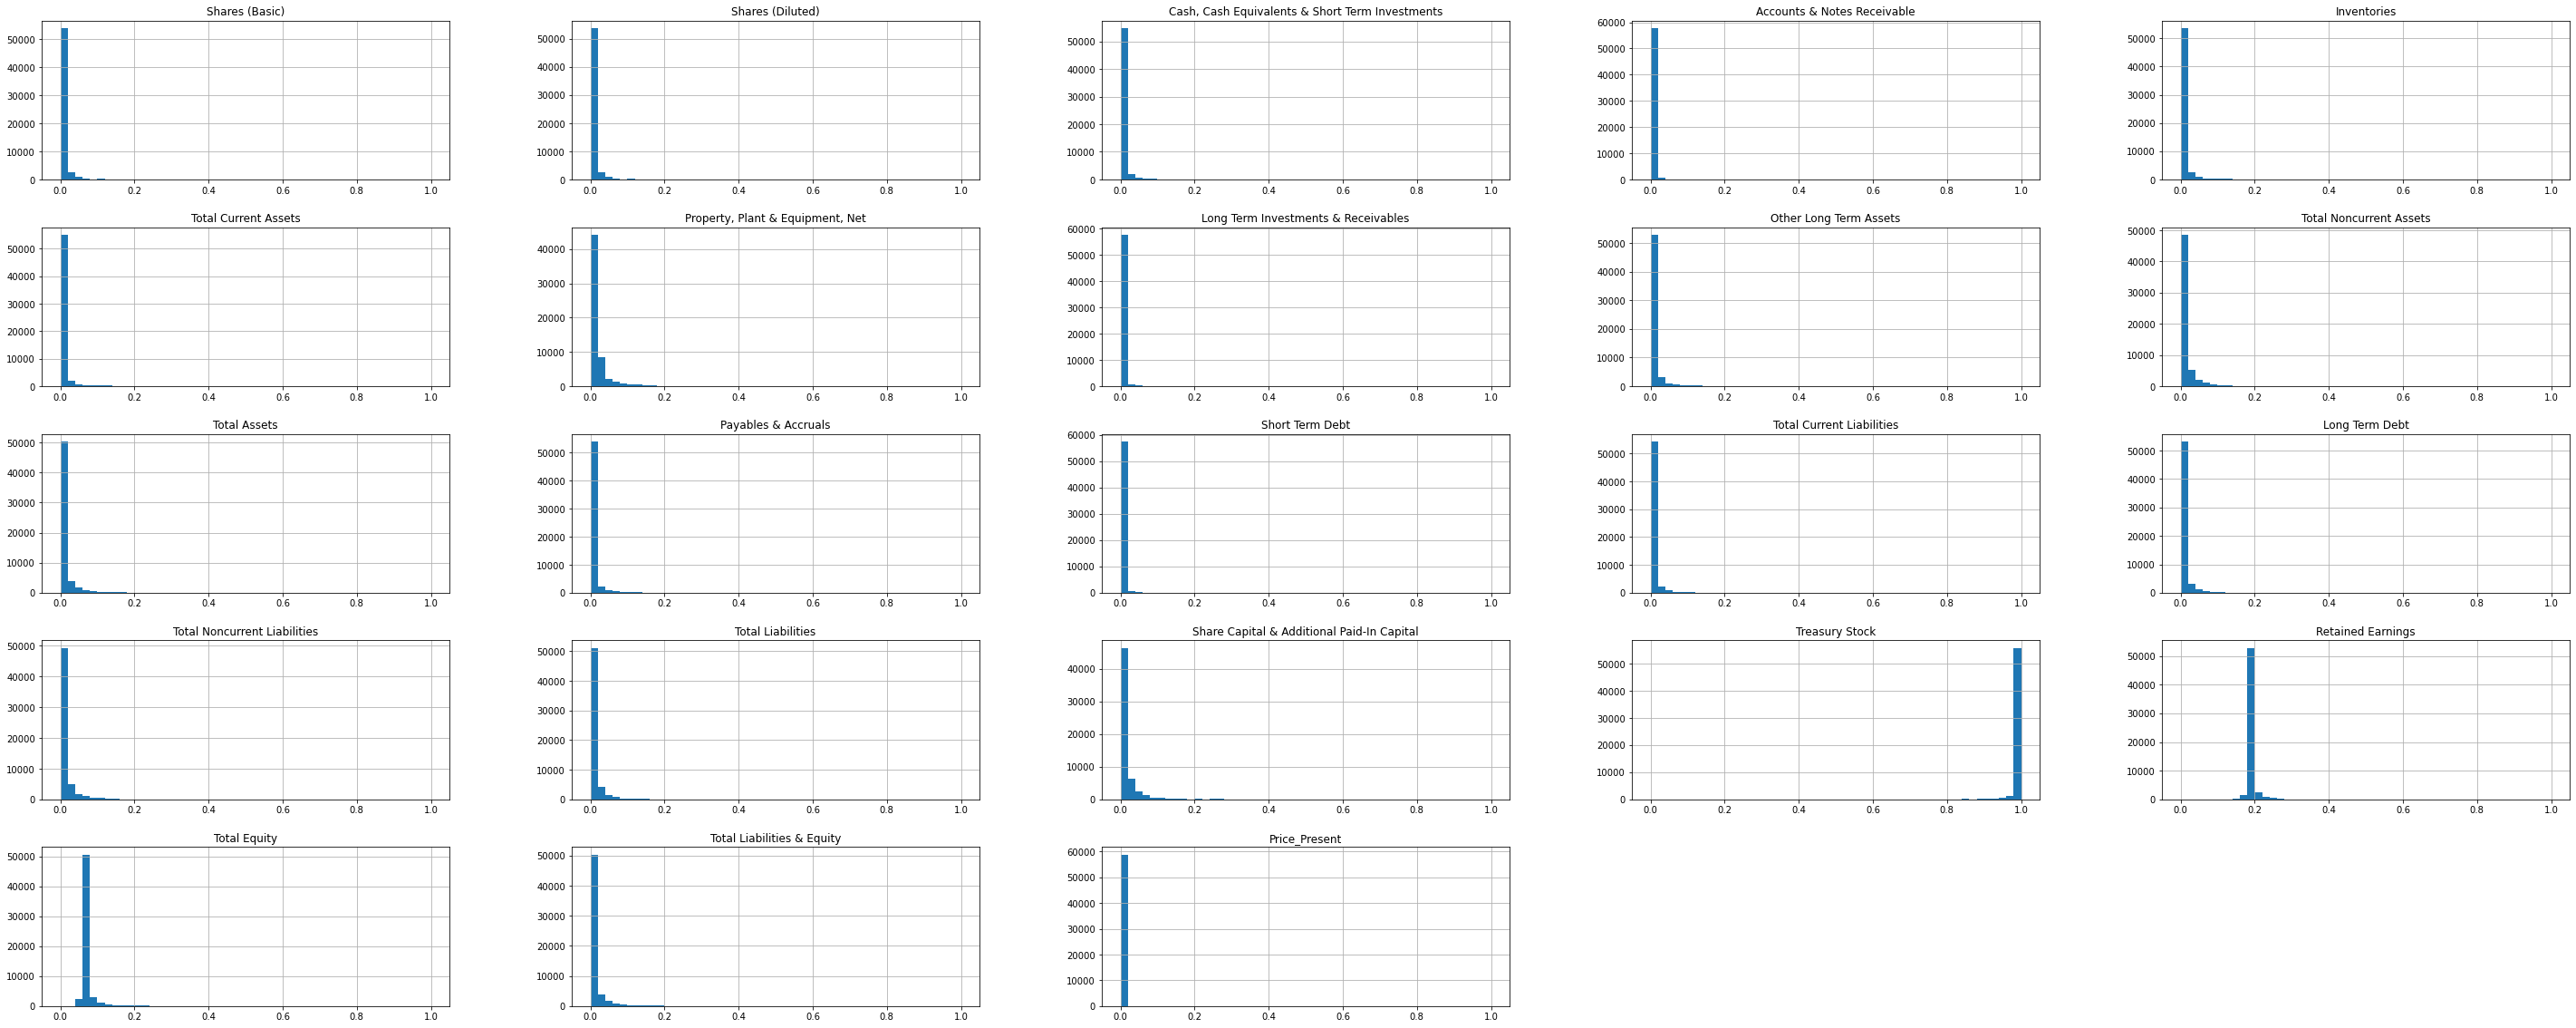

In [8]:
# plotting the hist of feature space
X.hist(bins=50,figsize=(50,20))
plt.savefig("./hist.png")

<AxesSubplot:>

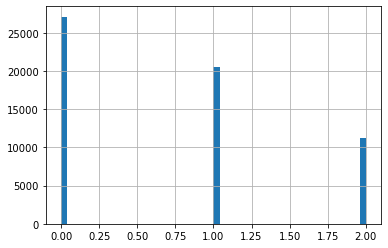

In [10]:
y.hist(bins=50)

# PCA 

In [15]:
# standardizing data

scaler = StandardScaler()# Fit on training set only.
scaler.fit(X)
X_scalar = scaler.transform(X)

In [29]:
# using default pca
pca = PCA(0.99)
X_pca = pca.fit_transform(X_scalar)

In [30]:
pca.explained_variance_ratio_

array([0.56100532, 0.08418943, 0.06765666, 0.05355659, 0.04350778,
       0.04269959, 0.0412653 , 0.02768553, 0.02099427, 0.01577345,
       0.01299374, 0.01028605, 0.00851598])

In [33]:
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.210449,0.043768,0.094531,-0.174895,-0.140680,-0.789205,-0.025926,0.566369,0.319323,0.262997,0.398186,0.178774,-0.171848
1,0.267291,0.050526,0.093986,-0.189874,-0.138021,-0.773965,-0.025386,0.604389,0.341467,0.237612,0.383158,0.173739,-0.171393
2,0.071494,-0.233925,0.181587,-0.153299,-0.138108,-0.715733,-0.154840,0.651989,0.385663,0.180419,0.289779,0.142280,-0.156122
3,0.126114,-0.227153,0.183069,-0.174100,-0.135205,-0.695129,-0.162635,0.690349,0.420802,0.146474,0.281265,0.130946,-0.149445
4,0.146986,-0.243517,0.182460,-0.189836,-0.137004,-0.708614,-0.159735,0.709782,0.448859,0.139408,0.278403,0.126295,-0.157264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58823,-1.039740,0.078976,0.024112,-0.003906,-0.002034,0.044161,0.139956,0.099264,-0.018927,0.007061,-0.003829,-0.039626,0.000421
58824,-1.039956,0.079430,0.025207,-0.002580,-0.002249,0.043071,0.139394,0.099795,-0.017854,0.006762,-0.001448,-0.039845,0.000103
58825,-1.037820,0.079236,0.026270,-0.002110,-0.002213,0.043895,0.137892,0.100894,-0.018072,0.007173,0.000653,-0.039798,-0.000360
58826,-1.034459,0.079764,0.029468,-0.001548,-0.002348,0.043128,0.137409,0.103660,-0.015866,0.004543,0.002015,-0.040047,-0.000643


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

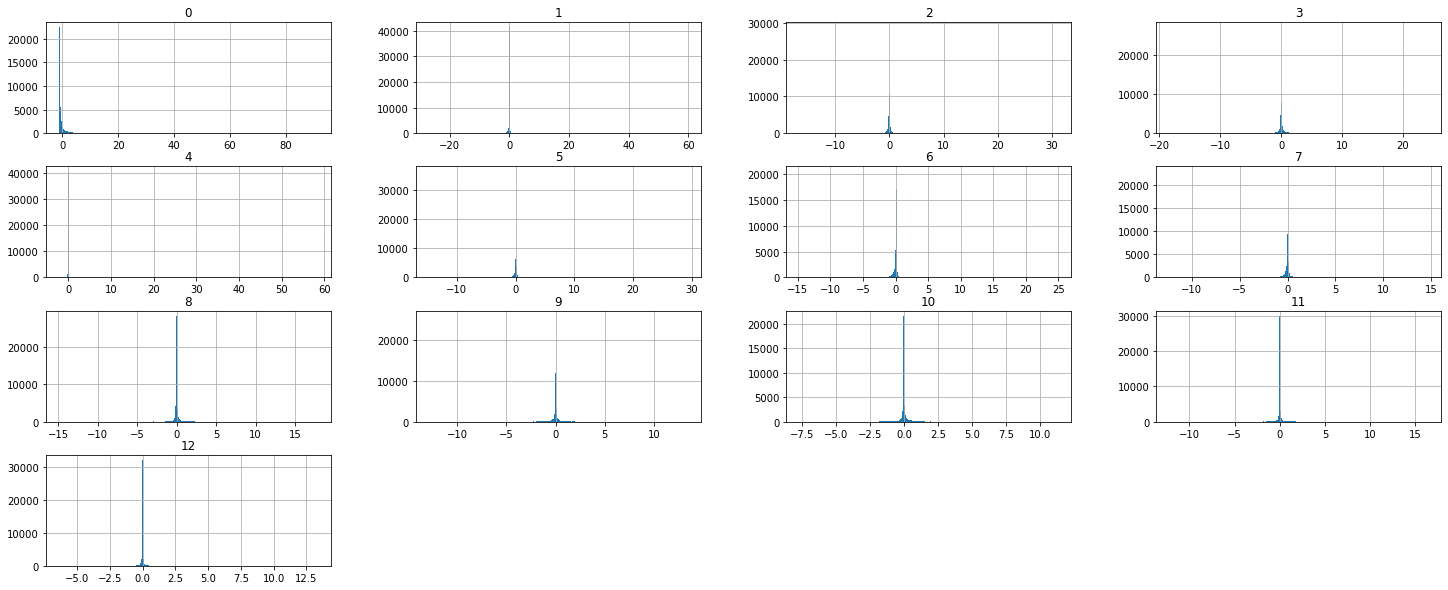

In [36]:
X_pca.hist(bins=500,figsize=(25,10))


### !Resample if PCA doesn't work

## Model & Training

In [39]:
# test-train split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X_pca, y, random_state=1
)

In [40]:
automl = autosklearn.classification.AutoSklearnClassifier(exclude_estimators=["mlp"])
automl.fit(X_train, y_train)

[WARNING] [2021-04-10 17:04:24,170:Client-AutoMLSMBO(1)::b210792e-99f0-11eb-acd4-05b9721043ea] Configuration 338 not found
[WARNING] [2021-04-10 17:04:24,171:Client-AutoMLSMBO(1)::b210792e-99f0-11eb-acd4-05b9721043ea] Configuration 43 not found
[WARNING] [2021-04-10 17:04:24,171:Client-AutoMLSMBO(1)::b210792e-99f0-11eb-acd4-05b9721043ea] Configuration 114 not found
[WARNING] [2021-04-10 17:04:24,172:Client-AutoMLSMBO(1)::b210792e-99f0-11eb-acd4-05b9721043ea] Configuration 283 not found
[WARNING] [2021-04-10 17:04:24,173:Client-AutoMLSMBO(1)::b210792e-99f0-11eb-acd4-05b9721043ea] Configuration 576 not found
[WARNING] [2021-04-10 17:04:24,174:Client-AutoMLSMBO(1)::b210792e-99f0-11eb-acd4-05b9721043ea] Configuration 71 not found
[WARNING] [2021-04-10 17:04:24,175:Client-AutoMLSMBO(1)::b210792e-99f0-11eb-acd4-05b9721043ea] Configuration 67 not found
[WARNING] [2021-04-10 17:04:24,176:Client-AutoMLSMBO(1)::b210792e-99f0-11eb-acd4-05b9721043ea] Configuration 188 not found
[WARNING] [2021-04-

AutoSklearnClassifier(exclude_estimators=['mlp'], per_run_time_limit=360)

In [41]:
print(automl.show_models())

[(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'pca', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adaboost:learning_rate': 0.04677400651042612, 'classifier:adaboost:max_depth': 8, 'classifier:adaboost:n_estimators': 206, 'feature_preprocessor:pca:keep_variance': 0.8037412071074002, 'feature_preprocessor:pca:whiten': 'False'},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.080000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'clas

In [42]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: b210792e-99f0-11eb-acd4-05b9721043ea
  Metric: accuracy
  Best validation score: 0.482074
  Number of target algorithm runs: 82
  Number of successful target algorithm runs: 73
  Number of crashed target algorithm runs: 4
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 1



In [44]:
y_pred = automl.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred,zero_division=False))
X_test = None
X_train = None

              precision    recall  f1-score   support

           0       0.48      0.83      0.61      6803
           1       0.46      0.24      0.32      5152
           2       0.73      0.07      0.12      2752

    accuracy                           0.48     14707
   macro avg       0.56      0.38      0.35     14707
weighted avg       0.52      0.48      0.42     14707

